## TITANIC

   O Titanic foi um navio britânico operado pela White Star Line, projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews para ser o navio mais luxuoso e seguro da época. 
    Sua construção se iniciou em Março de 1909 e foi lançado ao mar 2 anos após o inicio de sua construção, em Maio de 1911.
    O Titanic partiu do Reino Unido em 10 de Abril de 1912 e tinha como destino os Estados Unidos, com 3 pontos de embarque: Southampton (Reino Unido), Cherbourg-Octeville (França) e Queenstown (Irlanda), colidiu com um iceberg em 14 de Abril e afundou no dia seguinte com 1500 pessoas a bordo. 
    Após o naufrágio, foram identificadas várias deficiências nos procedimentos de evacuação e regulamentação dos serviços marítmos, isso forçou a entrada de novas regulamentações internacionais de navegação. 
    Seus destroços foram encontrados somente em 1985.

Analisando a lista de pessoas que embarcaram no Titanic, quais conclusões podem ser obtidas com essas informações?
- Qual o número de passageiros? 
- Qual a quantidade de pessoas por classe, gênero e faixa etária? 
- Quem teve mais chance de sobrevivência? Homens ou mulheres? 
- A Classe influenciou a quantidade de sobreviventes?
- Qual a faixa etária média dos mortos e sobreviventes?
- A maioria viajava sozinho ou acompanhado?
- Qual o percentual de crianças, adultos e idosos?
- Qual a distribuição de idade de todos os passageiros, sobreviventes e não sobreviventes?
- Qual a variação de tarifas de acordo com a classe etária?
- Qual a tarifa média por classe de embarque? 

Essas questões serão respondidos a seguir. 

Informações presentes no dataset:
    
- PassengerId: Index das linhas; 
- Survived: Se sobreviveu ou não (0-não;1-sim)
- Pclass: Classe de embarque. 1ª, 2ª ou 3ª
- Name: Nome do passageiro
- Sex: Gênero
- Age: Idade
- SibSp: Quantidade de irmãos e conjugês a bordo
- Parch: Quantidade de pais e filhos a bordo
- Ticket: Nº do bilhete de embarque
- Fare: Tarifa
- Cabin: Cabine
- Embarked: Local de Embarque

##### Importanto as bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

titanic = pd.read_csv('titanic-data-6.csv')

##### Conhecendo o dataset

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Limpeza e tratamento de dados

Serão feitas as seguintes alterações nos dados:
- o nome das colunas serão alterados para melhor entendimento;
- A coluna `id` será removida e será utilizado o index do dataframe;
- As colunas `nome`, `ticket` e `cabine` não serão analisadas e serão removidas;
- Os valores ausentes de `Idade` serão substituídos pela média de idade de cada classe de embarque;
- Os 2 registros com o local de embarque ausente serão excluídos.
- Os valores da coluna `sobreviveu` serão substituídos para S (sim) e N(não);
- Os valores da coluna `embarque` serão substituídos de S, C e Q para Southampton, Cherbourg, Queenstown respectivamente;
- Os valores da coluna `idade` serão convertidos para números inteiros;
- criação de nova coluna `class_etaria` para classificar em criança, adulto e idoso;
- Criação da coluna `familiares` para identificar a quantidade de acompanhantes;
- Criação da coluna `acompanhante` para identificar se viaja sozinho ou acompanhado.



##### Renomeando as colunas

In [3]:
titanic.columns = ['id', 'sobreviveu','classes', 'nome', 'genero', 'idade', 'irmaos_conjuge', 'pais_filhos','ticket','tarifa','cabine','embarque']
titanic.head(1)

,id,sobreviveu,classes,nome,genero,idade,irmaos_conjuge,pais_filhos,ticket,tarifa,cabine,embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
titanic.dtypes

id                  int64
sobreviveu          int64
classes             int64
nome               object
genero             object
idade             float64
irmaos_conjuge      int64
pais_filhos         int64
ticket             object
tarifa            float64
cabine             object
embarque           object
dtype: object

##### Excluindo colunas

In [5]:
# Retirando as colunas nome, ticket e cabine que não são relevantes
titanic.drop(['id','nome','ticket', 'cabine'],axis=1,inplace=True)

##### Substituindo os valores das colunas sobreviveu, local de embarque e gênero para facilitar o entendimento.

In [6]:
#Substituindo valores e formatando dados

def change_value (col, old_value, new_value):
        
    '''Função para substituir valores.
       Argumentos:
           col: nome da coluna que terá seus valores alterados
           old_value: valor a ser substituído
           new_value: novo valor.
        Retorna:
            Colunas com os valores alterados.
    '''
    titanic[col].replace(old_value, new_value, inplace=True)
    
change_value('sobreviveu',(0, 1), ('N','S'))
change_value('genero',('male','female'), ('masculino', 'feminino'))
change_value('embarque',('S','C','Q'),('Southampton','Cherbourg','Queenstown'))

In [7]:
titanic.head(10)

,sobreviveu,classes,genero,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,N,3,masculino,22.0,1,0,7.2500,Southampton
1,S,1,feminino,38.0,1,0,71.2833,Cherbourg
2,S,3,feminino,26.0,0,0,7.9250,Southampton
3,S,1,feminino,35.0,1,0,53.1000,Southampton
4,N,3,masculino,35.0,0,0,8.0500,Southampton
5,N,3,masculino,NaN,0,0,8.4583,Queenstown
6,N,1,masculino,54.0,0,0,51.8625,Southampton
7,N,3,masculino,2.0,3,1,21.0750,Southampton
8,S,3,feminino,27.0,0,2,11.1333,Southampton
9,S,2,feminino,14.0,1,0,30.0708,Cherbourg


In [8]:
titanic.dtypes

sobreviveu         object
classes             int64
genero             object
idade             float64
irmaos_conjuge      int64
pais_filhos         int64
tarifa            float64
embarque           object
dtype: object

##### Verificando valores nulos

In [9]:
titanic.count()

sobreviveu        891
classes           891
genero            891
idade             714
irmaos_conjuge    891
pais_filhos       891
tarifa            891
embarque          889
dtype: int64

In [10]:
#Verificando se há valores nulos
titanic.isnull().sum()

sobreviveu          0
classes             0
genero              0
idade             177
irmaos_conjuge      0
pais_filhos         0
tarifa              0
embarque            2
dtype: int64

In [11]:
# Excluindo linhas onde Embarque é um valor ausente, visto que são apenas 2 linhas e não influenciarão nas análises posteriores
titanic.dropna(subset=['embarque'], inplace=True)

##### Tratando os valores ausentes de Idade

In [12]:
# Identificando a idade média por classe
titanic.groupby('classes')['idade'].mean()

classes
1    38.105543
2    29.877630
3    25.140620
Name: idade, dtype: float64

In [13]:
#Criando as variáveis de media de idade
mean_1 = titanic[titanic['classes'] == 1]['idade'].mean()
mean_2 = titanic[titanic['classes'] == 2]['idade'].mean()
mean_3 = titanic[titanic['classes'] == 3]['idade'].mean()

In [14]:
print('Idade Média da Classe 1: ', mean_1, '\nIdade Média da Classe 2: ', mean_2, '\nIdade Média da Classe 2: '  , mean_3)

Idade Média da Classe 1:  38.10554347826087 
Idade Média da Classe 2:  29.87763005780347 
Idade Média da Classe 2:  25.14061971830986


In [15]:
#Criando um novo dataframe com as linhas de Idade = NaN
idade_nan = titanic[titanic['idade'].isnull()]

In [16]:
#Verificando a quantidade em cada classe
idade_nan.groupby('classes')['classes'].value_counts()

classes  classes
1        1           30
2        2           11
3        3          136
Name: classes, dtype: int64

In [17]:
#Criando novos dataframes de acordo com a classe de embarque
idade_nan_1 = idade_nan[idade_nan['classes'] == 1]
idade_nan_2 = idade_nan[idade_nan['classes'] == 2]
idade_nan_3 = idade_nan[idade_nan['classes'] == 3]

In [18]:
#Preenchendo a coluna idade de cada dataframe de classe com a idade média
idade_nan_1['idade'] = int(mean_1)
idade_nan_2['idade'] = int(mean_2)
idade_nan_3['idade'] = int(mean_3)

C:\Users\Pricks\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pricks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pricks\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [19]:
#Removendo do dataframe principal as linhas com idade = NaN
titanic.dropna(subset=['idade'], inplace=True)

In [20]:
# Anexando os novos dataframes com idade preenchida ao dataframe principal
titanic = titanic.append(idade_nan_1, ignore_index=True)
titanic = titanic.append(idade_nan_2, ignore_index=True)
titanic = titanic.append(idade_nan_3, ignore_index=True)


In [21]:
titanic.count()

sobreviveu        889
classes           889
genero            889
idade             889
irmaos_conjuge    889
pais_filhos       889
tarifa            889
embarque          889
dtype: int64

In [22]:
titanic.head()

,sobreviveu,classes,genero,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,N,3,masculino,22.0,1,0,7.2500,Southampton
1,S,1,feminino,38.0,1,0,71.2833,Cherbourg
2,S,3,feminino,26.0,0,0,7.9250,Southampton
3,S,1,feminino,35.0,1,0,53.1000,Southampton
4,N,3,masculino,35.0,0,0,8.0500,Southampton


##### Criando classificação etária

Embora a idade de início da responsabilidade penal na Inglaterra esteja fixada aos 10 anos, a privação de liberdade somente é admitida após os 15 anos de idade. [Idade Penal: Tabela Comparativa](http://www.crianca.mppr.mp.br/pagina-323.html)

Por esse motivo, vamos assumir que as crianças tem até 15 anos.

Crianças: de 0 a 15  
Adultos: de 16 a 59  
Idosos: Maior ou igual a 60 anos.


In [23]:
# Classificando em classe etária de acordo com a idade
bin_edges = [0, 15, 60, 80] # Preencha esta lista com os cinco valores que você acabou de encontrar

# Rótulos para os grupos de idade
bin_names = [ 'criança', 'adulto', 'idoso' ] 

# Criando a coluna de classe etária
titanic['class_etaria'] = pd.cut(titanic['idade'], bin_edges, labels=bin_names)

titanic.head()

,sobreviveu,classes,genero,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,class_etaria
0,N,3,masculino,22.0,1,0,7.2500,Southampton,adulto
1,S,1,feminino,38.0,1,0,71.2833,Cherbourg,adulto
2,S,3,feminino,26.0,0,0,7.9250,Southampton,adulto
3,S,1,feminino,35.0,1,0,53.1000,Southampton,adulto
4,N,3,masculino,35.0,0,0,8.0500,Southampton,adulto


In [24]:
titanic['familiares'] = titanic['irmaos_conjuge'] + titanic['pais_filhos']
sozinho = titanic.query('familiares == 0')
acompanhados = titanic.query('familiares > 0')

sozinho['acompanhante'] = 'N'
acompanhados['acompanhante'] = 'S'

titanic = pd.DataFrame(columns = ['sobreviveu', 'classes', 'genero', 'idade', 'irmaos_conjuge', 'pais_filhos', 'tarifa', 'embarque', 'class_etaria', 'familiares', 'acompanhante'])
titanic = titanic.append(sozinho, ignore_index=True)
titanic = titanic.append(acompanhados, ignore_index=True)

C:\Users\Pricks\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Pricks\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
titanic.head()

,sobreviveu,classes,genero,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,class_etaria,familiares,acompanhante
0,S,3,feminino,26.0,0,0,7.9250,Southampton,adulto,0,N
1,N,3,masculino,35.0,0,0,8.0500,Southampton,adulto,0,N
2,N,1,masculino,54.0,0,0,51.8625,Southampton,adulto,0,N
3,S,1,feminino,58.0,0,0,26.5500,Southampton,adulto,0,N
4,N,3,masculino,20.0,0,0,8.0500,Southampton,adulto,0,N


In [26]:
titanic.dtypes

sobreviveu         object
classes            object
genero             object
idade             float64
irmaos_conjuge     object
pais_filhos        object
tarifa            float64
embarque           object
class_etaria       object
familiares         object
acompanhante       object
dtype: object

In [27]:
#Formatando as colunas familiares, irmãos_conjuge e pais_filhos
titanic['familiares'] = titanic['familiares'].astype(int, inplace=True)
titanic['irmaos_conjuge'] = titanic['irmaos_conjuge'].astype(int, inplace=True)
titanic['pais_filhos'] = titanic['pais_filhos'].astype(int, inplace=True)

In [28]:
titanic.dtypes

sobreviveu         object
classes            object
genero             object
idade             float64
irmaos_conjuge      int32
pais_filhos         int32
tarifa            float64
embarque           object
class_etaria       object
familiares          int32
acompanhante       object
dtype: object

##### Visão geral das variáveis numéricas

In [29]:
titanic.describe()

,idade,irmaos_conjuge,pais_filhos,tarifa,familiares
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,29.206040,0.524184,0.382452,32.096681,0.906637
std,13.177747,1.103705,0.806761,49.697504,1.614703
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800,0.000000
50%,26.000000,0.000000,0.000000,14.454200,0.000000
75%,36.500000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,10.000000


#### Visão geral dos ocupantes do Titanic

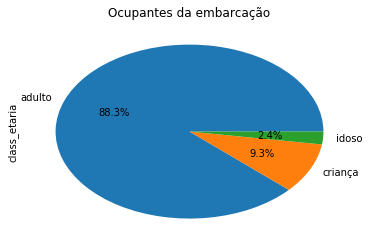

In [30]:
# Percentual de ocupantes do Titanic
titanic['class_etaria'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%');
plt.title('Ocupantes da embarcação');

- Dos 889 passageiros presentes nos dados,  88.3% eram adultos, 9.3% crianças e 2% idosos.

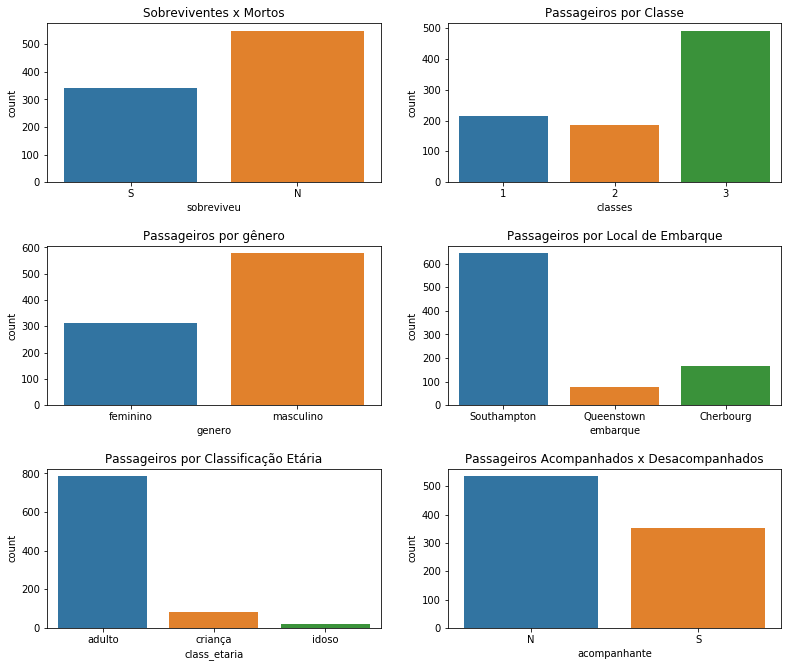

In [31]:
#Variáveis categóricas
    
col = ['sobreviveu','classes', 'genero', 'embarque', 'class_etaria', 'acompanhante']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for col, ax in zip(col, axs.ravel()):
    sns.countplot(x=col, data=titanic, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.40, wspace=0.2)
    axs[0,0].set_title('Sobreviventes x Mortos')
    axs[0,1].set_title('Passageiros por Classe')
    axs[1,0].set_title('Passageiros por gênero')
    axs[1,1].set_title('Passageiros por Local de Embarque')
    axs[2,0].set_title('Passageiros por Classificação Etária')
    axs[2,1].set_title('Passageiros Acompanhados x Desacompanhados')

        

In [32]:
#Porcentagem de sobreviventes e mortos
titanic['sobreviveu'].value_counts(normalize=True)

N    0.617548
S    0.382452
Name: sobreviveu, dtype: float64

Analisando os gráficos, podemos verificar que: 

- O número de mortos foi maior que o número de sobreviventes;
- A maioria dos passageiros eram da classe 3;
- A maioria dos passageiros eram do sexo masculino;
- A maioria dos passageiros embarcaram em Southampton, seguido de Cherbourg e Queenstown;
- A maioria dos passageiros eram adultos e viajavam sozinhos;
- Apenas 38% dos passageiros sobreviveram.

#### Sobreviventes x Não Sobreviventes

###### Por gênero, classe e classificação etária

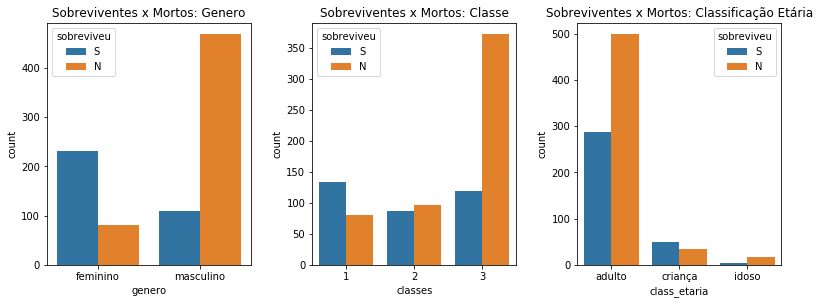

In [33]:
#Variáveis categóricas - Analisando sobreviventes e mortos.
col = ['genero', 'classes', 'class_etaria']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for col, ax in zip(col[0:], axs.ravel()):
    sns.countplot(x=col, data=titanic, ax=ax, hue='sobreviveu')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.30)
    axs[0].set_title('Sobreviventes x Mortos: Genero')
    axs[1].set_title('Sobreviventes x Mortos: Classe')
    axs[2].set_title('Sobreviventes x Mortos: Classificação Etária')


- Morreram mais homens que mulheres;
- A maioria dos mortos eram da 3ª classe;
- Não há diferença significativa entre os sobreviventes e mortos da classe 2;
- Houve mais sobreviventes que mortos na classe 1;
- Em relação a classificação etária, exceto crianças, o número de sobreviventes foi maior que falecidos.

#### Classe x genero

###### Por sobreviventes e não sobreviventes por gênero

In [34]:
#Criando variáveis de sobreviventes e não sobreviventes
sobreviventes = titanic[titanic['sobreviveu'] == 'S']
n_sobreviventes = titanic[titanic['sobreviveu'] == 'N']

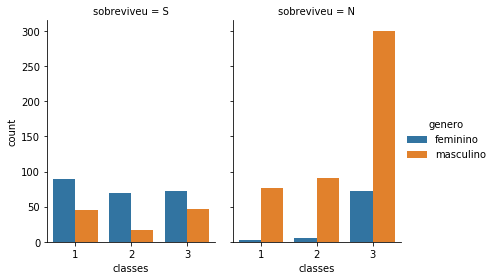

In [35]:
#Gráficos classe x gênero
sns.catplot(x="classes", hue="genero", col="sobreviveu", data=titanic, kind="count", height=4, aspect=.7);

In [36]:
titanic.groupby(['sobreviveu', 'genero'])['classes'].value_counts()

sobreviveu  genero     classes
N           feminino   3           72
                       2            6
                       1            3
            masculino  3          300
                       2           91
                       1           77
S           feminino   1           89
                       3           72
                       2           70
            masculino  3           47
                       1           45
                       2           17
Name: classes, dtype: int64

- Analisando por gênero e classe, observamos que o maior número de mortos são homens da classe 3;
- Em todas as classes, o número de sobreviventes do gênero feminino é maior que o número de sobreviventes do gênero masculino;
- Sobreviveram mais mulheres da classe 1 do que das classes 2 e 3;
- Morreram apenas 3 mulheres da classe 1.

#### Histogramas de Idade

C:\Users\Pricks\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


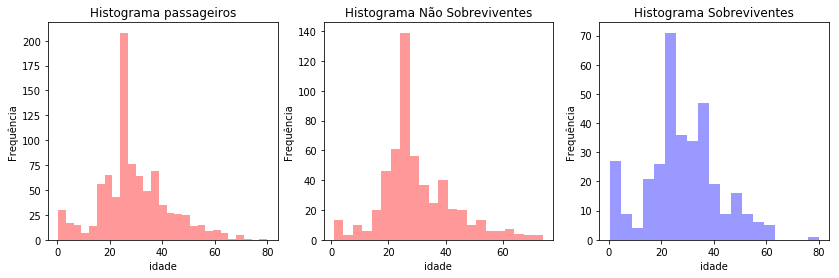

In [37]:
# plot
f, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.distplot(titanic['idade'], kde=False, color="red", ax=axes[0]).set_title("Histograma passageiros");
sns.distplot(n_sobreviventes['idade'], kde=False, color="red", ax=axes[1]).set_title("Histograma Não Sobreviventes");
sns.distplot(sobreviventes['idade'], kde=False, color="blue", ax=axes[2]).set_title("Histograma Sobreviventes");
axes[0].set_ylabel('Frequência');
axes[1].set_ylabel('Frequência');
axes[2].set_ylabel('Frequência');

In [38]:
titanic['idade'].mean()

29.20604049493813

- A maioria dos passageiros tinha entre 20 e 30 anos;
- De 0 a 10 anos, houve mais sobreviventes do que falecidos;
- A idade média dos passageiros era de 29 anos.

#### Crianças x Adultos x Idosos
##### Ocupantes da embarcação por classe de embarque

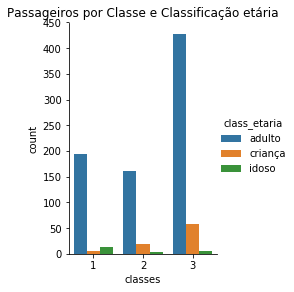

In [39]:
sns.catplot(x="classes", hue="class_etaria", data=titanic, kind="count", height=4, aspect=.7)
plt.title("Passageiros por Classe e Classificação etária");

In [40]:
titanic['class_etaria'].value_counts(normalize=True)

adulto     0.883015
criança    0.093363
idoso      0.023622
Name: class_etaria, dtype: float64

- A maioria dos ocupantes eram adultos, seguidos de crianças e idosos, exceto na 1ª classe.
- 88.3% dos ocupantes eram adultos, 9.3% crianças e 2.4%

In [41]:
titanic.groupby('classes')['class_etaria'].value_counts()

classes  class_etaria
1        adulto          195
         idoso            13
         criança           6
2        adulto          162
         criança          19
         idoso             3
3        adulto          428
         criança          58
         idoso             5
Name: class_etaria, dtype: int64

In [42]:
sobreviventes.groupby('classes')['class_etaria'].value_counts()

classes  class_etaria
1        adulto          127
         criança           5
         idoso             2
2        adulto           67
         criança          19
         idoso             1
3        adulto           93
         criança          25
         idoso             1
Name: class_etaria, dtype: int64

In [43]:
n_sobreviventes.groupby('classes')['class_etaria'].value_counts()

classes  class_etaria
1        adulto           68
         idoso            11
         criança           1
2        adulto           95
         idoso             2
3        adulto          335
         criança          33
         idoso             4
Name: class_etaria, dtype: int64

- Dos 195 passageiros da classe 1, 127 sobreviveram;  
- Das 6 crianças da classe 1, apenas 1 não sobreviveu;  
- Dos 428 adultos da classe 3, 333 não sobreviveram; 

#### Variação de Tarifas

##### Variação de tarifas

In [44]:
titanic.groupby('class_etaria')['tarifa'].describe()

,count,mean,std,min,25%,50%,75%,max
class_etaria,,,,,,,,
adulto,785.0,31.824919,50.993433,0.0000,7.8958,13.00,30.00000,512.3292
criança,83.0,32.785795,33.466438,7.2250,15.9000,26.25,32.19375,211.3375
idoso,21.0,39.531748,55.435684,6.2375,10.5000,26.55,34.65420,263.0000


##### Variação de tarifas por classe etária:
    Crianças: de 7.2 a 211,33
    Adultos: de 0 a 512
    Idosos: 6.2 a 263


##### Tarifa média

In [45]:
titanic.groupby('classes')['tarifa'].describe()

,count,mean,std,min,25%,50%,75%,max
classes,,,,,,,,
1,214.0,84.193516,78.746457,0.0,30.77185,58.6896,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


##### Tarifa média dos passageiros por classe:  
    Classe 1: 84.19  
    Classe 2: 20.66  
    Classe 3: 13.67  

##### Verificando passageiros com tarifa = 0

In [46]:
titanic[titanic['tarifa'] == 0]

,sobreviveu,classes,genero,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,class_etaria,familiares,acompanhante
72,N,3,masculino,36.0,0,0,0.0,Southampton,adulto,0,N
113,N,1,masculino,40.0,0,0,0.0,Southampton,adulto,0,N
116,S,3,masculino,25.0,0,0,0.0,Southampton,adulto,0,N
132,N,3,masculino,19.0,0,0,0.0,Southampton,adulto,0,N
258,N,3,masculino,49.0,0,0,0.0,Southampton,adulto,0,N
360,N,1,masculino,39.0,0,0,0.0,Southampton,adulto,0,N
370,N,1,masculino,38.0,0,0,0.0,Southampton,adulto,0,N
418,N,1,masculino,38.0,0,0,0.0,Southampton,adulto,0,N
423,N,1,masculino,38.0,0,0,0.0,Southampton,adulto,0,N
427,N,2,masculino,29.0,0,0,0.0,Southampton,adulto,0,N


- As tarifas igual a 0 ou que não tiveram o valor informado, possivelmente eram de tripulantes, visto que eram homens com idade entre 19 e 40 anos, viajando sozinhos.

#### Conclusão

No naufrágio do Titanic, das 889 pessoas que embarcaram, 61% morreram, 468 homens e 81 mulheres, a maioria dos homens embarcaram na classe 3 em Southampton. 
67% dos que não sobreviveram eram da classe 3, 17% da classe 2 e 14% classe 1. 
Entre os sobreviventes, 39% eram da classe 1, 35% classe 3 e 25% classe 2. 
67% dos sobreviventes eram do sexo feminino. 

Com isso podemos concluir que a 1º classe e as mulheres tiveram prioridade no embarque dos botes salva vidas. 



#### Limitações

A falta de informações em Idade, cabine e Embarque para alguns passageiros foram fatores limitantes na análise realizada. Para contornar o problema, algumas ações foram tomadas:  
        `Idade`: Os valores ausentes foram preenchidos com a idade média da classe de embarque;  
        `Cabine`: As informações de cabine foram descartadas para todos os passageiros, pois não seriam consideradas na fase exploratória.  
        `Embarque`: Os 2 passageiros que não tinham informação de embarque foram descartados.   



#### Referências:

[Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic)  
[Investigando o naufrágio do Titanic - Márcio Ozório de Jesus](https://medium.com/marciojesus/investigando-o-naufr%C3%A1gio-do-titanic-b478c7750d31)  
[O que o Naufrágio do Titanic nos ensina até hoje - Paulo Vasconcellos](https://paulovasconcellos.com.br/o-que-o-naufr%C3%A1gio-do-titanic-nos-ensina-at%C3%A9-hoje-data-science-project-2fea8ff1c9b5)  
[Idade Penal: Tabela Comparativa](http://www.crianca.mppr.mp.br/pagina-323.html)


__________________________________________________________________________________________________________________________

###### Elaborado por Priscila Agostinho em 31/12/2018.